In [32]:
# Open the file
with open('msd1.lammps', 'r') as f:
    data1 = f.readlines()

In [33]:
# Open the file
with open('msd05.lammps', 'r') as f:
    data05 = f.readlines()

In [34]:
# Open the file
with open('msd01.lammps', 'r') as f:
    data01 = f.readlines()

In [35]:
# Open the file
with open('msd005.lammps', 'r') as f:
    data005 = f.readlines()

In [36]:
# Open the file
with open('msd001.lammps', 'r') as f:
    data001 = f.readlines()

In [37]:
# Open the file
with open('msd0001.lammps', 'r') as f:
    data0001 = f.readlines()

In [38]:
def get_msd_val(data, line_number):
    l = data[line_number]
    segments = l.split()
    return float(segments[6])

In [39]:
def plot_msd(data, eps):
    sets = []
    resetter = 0
    subtracter = 0
    while (resetter+50) < len(data):
        single_set = []
        for j in range(resetter, resetter+50):
            single_set.append(get_msd_val(data, j) - subtracter)
        sets.append(single_set)
        resetter = resetter + 10
        subtracter = get_msd_val(data, resetter)
    avg_set = []
    for i in range(50):
        summ = 0
        for j in range(len(sets)):
            summ += sets[j][i]
        avg = summ/len(sets)
        avg_set.append(avg)
    import matplotlib.pyplot as plt
    import numpy as np
    plt.plot(avg_set)
    plt.show()

    s, i = np.polyfit([i for i in range(50)], avg_set, 1)
    print("Slope for EPS = {} : {}".format(eps, s))
    return s

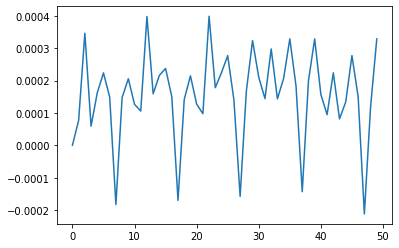

Slope for EPS = 1.0 : 4.823393571689564e-07


In [40]:
s1 = plot_msd(data1, "1.0")

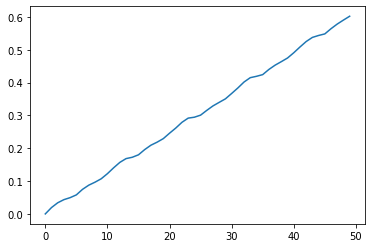

Slope for EPS = 0.5 : 0.01224015097248291


In [41]:
s05 = plot_msd(data05, "0.5")

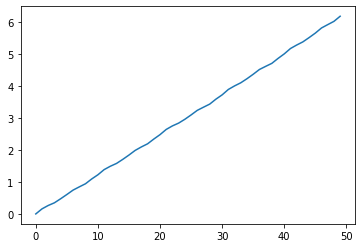

Slope for EPS = 0.1 : 0.12609406970652962


In [42]:
s01 = plot_msd(data01, "0.1")

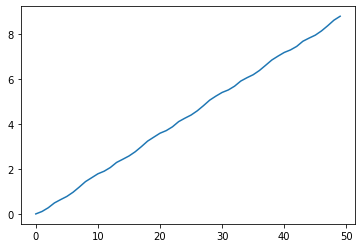

Slope for EPS = 0.05 : 0.1800983142483429


In [43]:
s005 = plot_msd(data005, "0.05")

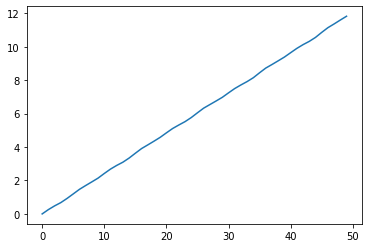

Slope for EPS = 0.01 : 0.24124368583397893


In [44]:
s001 = plot_msd(data001, "0.01")

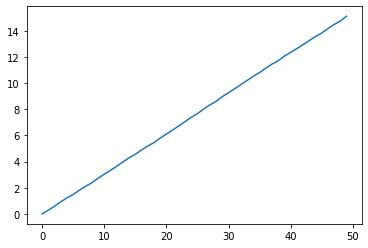

Slope for EPS = 0.001 : 0.30937337613574833


In [45]:
s0001 = plot_msd(data0001, "0.001")

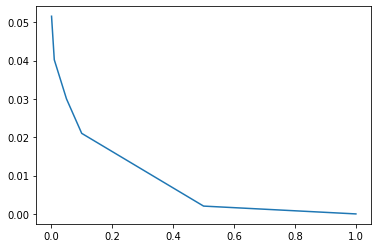

In [46]:
import matplotlib.pyplot as plt
plt.plot([0.001, 0.01, 0.05, 0.1, 0.5, 1.0], [s0001/6, s001/6, s005/6, s01/6, s05/6, s1/6])